## **CNNs** are powerful image processing, artificial intelligence (AI) that use deep learning to perform both generative and descriptive tasks, often using machine vison that includes image and video recognition, along with recommender systems and natural language processing (NLP).

#So i have implemented a Smoke and Fire Classification model using the CNN . It can classify that the given image contains the smoke or fire and based on the image , it gives a result. I have and train my model for 25 epochs, it gave me and 96.05% accuracy on the validation data.

# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.callbacks import History
import PIL


In [2]:
# img=image.load_img("Dataset/Training_and_Validation/nofire/nofire_0002.jpg")

In [3]:
# plt.imshow(img)

# Data Preprocessing 

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('Dataset2/Training/',target_size=(224,224),
                                       class_mode='categorical',shuffle=True)
validation_dataset=validation.flow_from_directory('Dataset2/validation/',target_size=(224,224)
                                    ,class_mode='categorical',shuffle=True)


Found 1681 images belonging to 3 classes.
Found 585 images belonging to 3 classes.


In [7]:
train_dataset.class_indices

{'fire': 0, 'nofire': 1, 'smoke': 2}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2])

# Implementation of  CNN Architecture

In [9]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax'),
                                  
                                 ])


# Model compilation

In [10]:
model.compile(loss='categorical_crossentropy',
optimizer=Adam(lr=0.0001),
metrics=['acc'])

C:\Users\ASUS\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Training the model

In [11]:
history= model.fit(
train_dataset,
steps_per_epoch = 15,
epochs =60,
validation_data = validation_dataset,
validation_steps = 15
)

Epoch 1/60
15/15 [==============================] - 16s 1s/step - loss: 0.5940 - acc: 0.7292 - val_loss: 0.2806 - val_acc: 0.8729
Epoch 2/60
15/15 [==============================] - 15s 1s/step - loss: 0.2781 - acc: 0.8833 - val_loss: 0.2236 - val_acc: 0.9125
Epoch 3/60
15/15 [==============================] - 15s 1s/step - loss: 0.2713 - acc: 0.8896 - val_loss: 0.1980 - val_acc: 0.9104
Epoch 4/60
15/15 [==============================] - 15s 1s/step - loss: 0.2418 - acc: 0.9146 - val_loss: 0.1717 - val_acc: 0.9375
Epoch 5/60
15/15 [==============================] - 15s 977ms/step - loss: 0.2298 - acc: 0.9140 - val_loss: 0.1729 - val_acc: 0.9396
Epoch 6/60
15/15 [==============================] - 15s 1s/step - loss: 0.2216 - acc: 0.9187 - val_loss: 0.1858 - val_acc: 0.9375
Epoch 7/60
15/15 [==============================] - 15s 1s/step - loss: 0.2348 - acc: 0.9083 - val_loss: 0.1607 - val_acc: 0.9563
Epoch 8/60
15/15 [==============================] - 15s 1s/step - loss: 0.2126 - acc: 0

# Model Evaluation

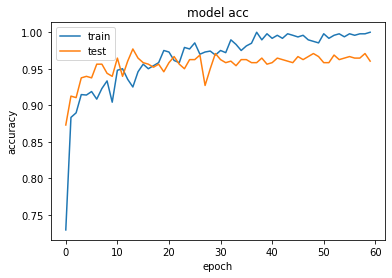

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss


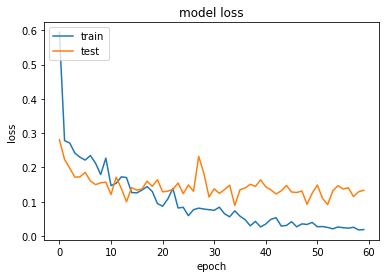

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(validation_dataset)
print('Test accuracy:', score[1])

19/19 [==============================] - 5s 242ms/step - loss: 0.1338 - acc: 0.9607
Test accuracy: 0.9606837630271912


## Saving the model

In [25]:
model.save("Smoke_and_Fire_Classifiernew3.h5")
# model.save("Smoke_and_Fire_Classifier.h5")


In [26]:
from keras.models import load_model
my_model = load_model("Smoke_and_Fire_Classifiernew3.h5")

# Testing our model

In [27]:
def test_model(image_for_testing):
    test_image=image.load_img(image_for_testing,target_size=(224,224))
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    test_image=np.expand_dims(test_image,axis=0)
    result=np.argmax(my_model.predict(test_image),axis=1)

    Catagories=['fire', 'nofire', 'smoke']

    image_show=PIL.Image.open(image_for_testing)
    plt.imshow(image_show)

#     plt.title(Catagories[int(result)])
    plt.title(int(result))
    plt.axis("off")
    plt.show()


1/1 [==============================] - 0s 160ms/step


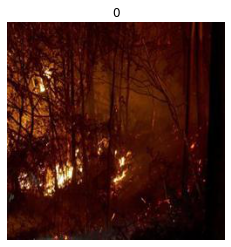

In [28]:
test_model('Dataset/Testing/fire/abc017.jpg')

1/1 [==============================] - 0s 56ms/step


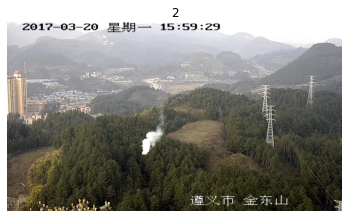

In [29]:
test_model('Dataset/Testing/smoke/000823.jpg')

1/1 [==============================] - 0s 40ms/step


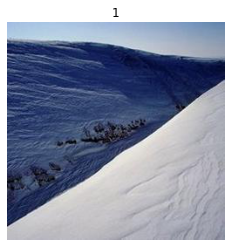

In [30]:
test_model('Dataset/Testing/nofire/abc277.jpg')

1/1 [==============================] - 0s 31ms/step


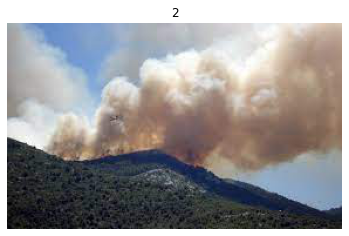

In [21]:
test_model('fireproject/download.jpg')